# Conditional Variational Autoencoder Implementation

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

def CAE(input_dim, condition_dim, latent_dim):
    
    # Define input layers for input and condition
    input_data = Input(shape=(input_dim,))
    condition_data = Input(shape=(condition_dim,))
    combined_input = tf.keras.layers.concatenate([input_data, condition_data])

    # Encoder
    encoded = Dense(64, activation='relu')(combined_input)
    encoded = Dense(32, activation='relu')(encoded)
    encoded = Dense(latent_dim, activation='relu')(encoded)

    # Decoder
    combined_input = tf.keras.layers.concatenate([condition_data, encoded])
    
    decoded = Dense(32, activation='relu')(combined_input)
    decoded = Dense(64, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    # Create the model
    model = Model(inputs=[input_data, condition_data], outputs=decoded)

    return model

In [14]:
# Generate random data to train the model
num_samples = 1000
input_dim = 100
condition_dim = 10

input_data = np.random.random((num_samples, input_dim))
condition_data = np.random.random((num_samples, condition_dim))

# Define the reconstruction loss
target_data = input_data

# Create the model
latent_dim = 10
Fitness_CAE = CAE(input_dim, condition_dim, latent_dim)

# Compile and train the model
Fitness_CAE.compile(optimizer='adam', loss='mse')
history = Fitness_CAE.fit([input_data, condition_data], input_data, epochs=100, batch_size=32)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.0833
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0827
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0824
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0819
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0810
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0801
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0793
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0788
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0782
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0778
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0775
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0771
Epoch 13/100
32/32 [=================

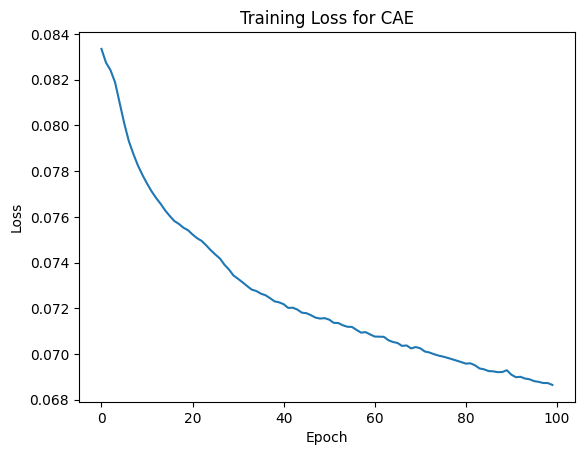

In [15]:
plt.plot(history.history['loss'])
plt.title('Training Loss for CAE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

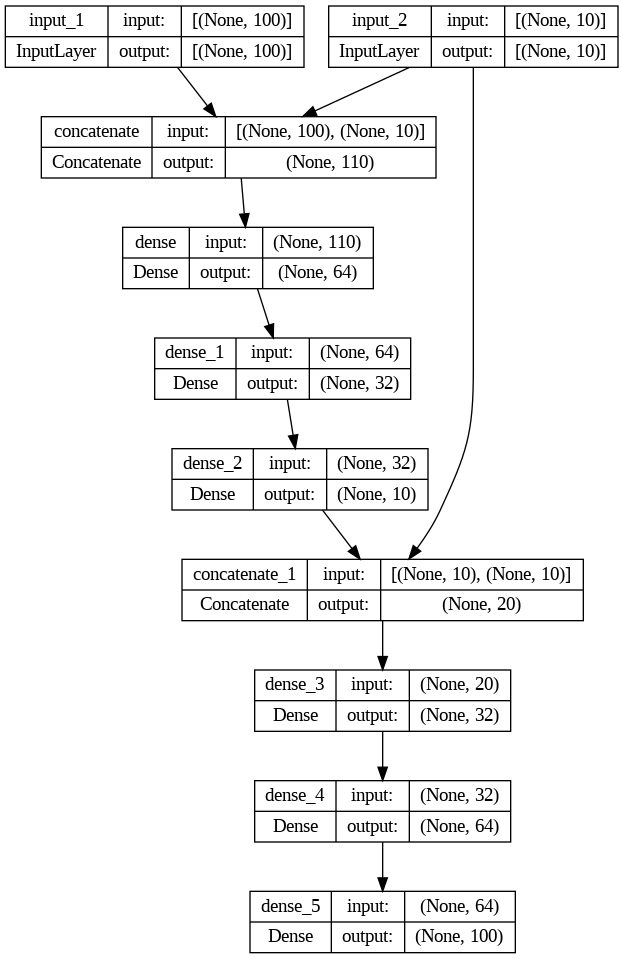

In [3]:
plot_model(Fitness_CAE, to_file='CVAE.png', show_shapes=True)

In [4]:
# Adding the sampling for vaiational layer
def CVAE(input_dim, condition_dim, latent_dim):
    
    # Define input layers for input and condition
    input_data = Input(shape=(input_dim,))
    condition_data = Input(shape=(condition_dim,))
    combined_input = tf.keras.layers.concatenate([input_data, condition_data])

    # Encoder
    encoded = Dense(64, activation='relu')(combined_input)
    encoded = Dense(32, activation='relu')(encoded)

    # Variational layer
    z_mean = Dense(latent_dim)(encoded)
    z_log_var = Dense(latent_dim)(encoded)

    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling)([z_mean, z_log_var])

    # Decoder
    combined_input = tf.keras.layers.concatenate([condition_data, z])
    decoded = Dense(32, activation='relu')(combined_input)
    decoded = Dense(64, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    # Create the model
    model = Model(inputs=[input_data, condition_data], outputs=decoded)

    return model


In [5]:
# Generate random data to train the model
num_samples = 1000
input_dim = 100
condition_dim = 10

input_data = np.random.random((num_samples, input_dim))
condition_data = np.random.random((num_samples, condition_dim))

# Define the reconstruction loss
target_data = input_data

# Create the model
latent_dim = 10
Fitness_CVAE = CVAE(input_dim, condition_dim, latent_dim)

# Compile and train the model
Fitness_CVAE.compile(optimizer='adam', loss='mse')
history = Fitness_CVAE.fit([input_data, condition_data], input_data, epochs=100, batch_size=32)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 0.0843
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0835
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0834
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0833
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0831
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0828
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0822
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0814
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0807
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0802
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0799
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0794
Epoch 13/100
32/32 [=================

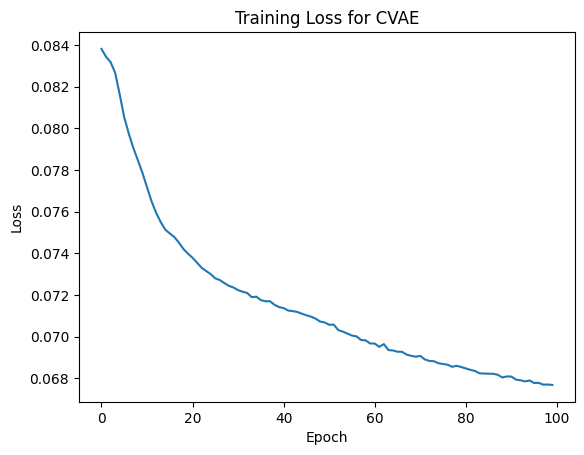

In [13]:
plt.plot(history.history['loss'])
plt.title('Training Loss for CVAE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

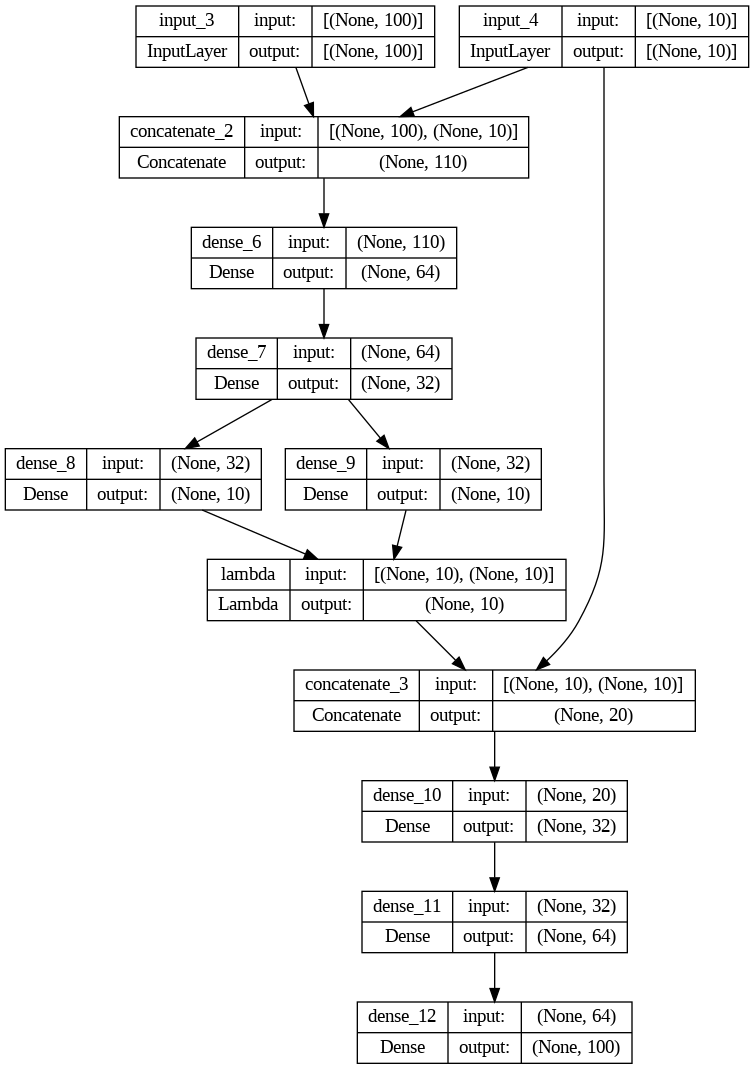

In [6]:
plot_model(Fitness_CVAE, to_file='CAVE.png', show_shapes=True)